In [1]:
from __future__ import print_function
import numpy as np
import SimpleITK as sitk
import os
#%matplotlib notebook
import matplotlib.pyplot as plt
import cv2
from cv2 import imread

In [2]:
def imreadseq(fdpath,sitkimg = True) :
    images = []
    for image in sorted(os.listdir(fdpath)):
        simage = imread(os.path.join(fdpath,image),0)
        images.append(simage)
    images = np.asarray(images)
    if sitkimg == True:
        images = sitk.GetImageFromArray(images)
    return images

In [3]:
images = imread('D:\\MicroCT data\\4th batch bone mets loading study\\Registration week 0\\418 week 0 left registered\\418 week 0 left 000001.tif',0)

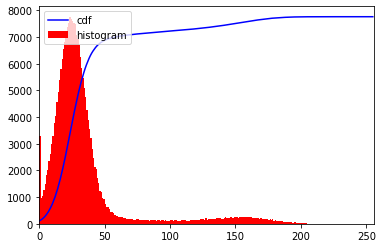

In [4]:
hist,bins = np.histogram(images.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(images.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

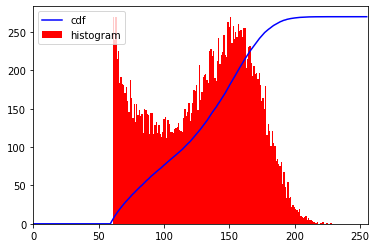

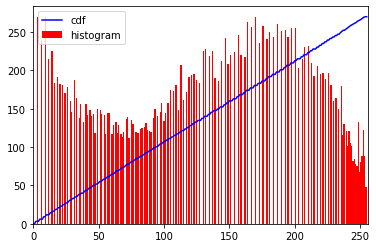

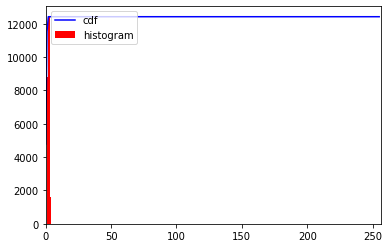

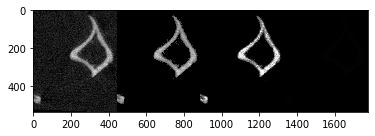

In [30]:
mask = ( images > 60)
image1 = images*(mask)

hist,bins = np.histogram(image1.flatten(),256,[1,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(image1.flatten(),256,[1,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

image2 = cv2.equalizeHist(image1)

hist,bins = np.histogram(image2.flatten(),256,[1,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(image2.flatten(),256,[1,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

image3 = np.clip((np.int8(image1)-60)*255/195,0,255)
image3 = image1

hist,bins = np.histogram(image3.flatten(),256,[1,255])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(image3.flatten(),256,[1,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

p = np.hstack((images,image1,image2, image3))
plt.imshow(p, cmap='gray', vmin=0, vmax=255)